# 1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2 Importing the data file

In [2]:
data = pd.read_csv('fifa21_male2.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# 3 Exploring and Cleaning the data 

In [4]:
#Standardizing columns' name
data.columns = data.columns.str.lower()
data

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [5]:
fifa = data[['name', 'age', 'ova', 'nationality', 'pot', 'foot', 'value', 'wage', 'power', 'mentality', 'aggression']].copy()
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression
0,G. Pasquale,33,69,Italy,69,Left,€625K,€7K,347,320,72
1,Luis García,37,71,Spain,71,Right,€600K,€7K,324,362,71
2,J. Cole,33,71,England,71,Right,€1.1M,€15K,284,317,69
3,D. Yorke,36,68,Trinidad &amp; Tobago,82,Right,€0,€0,239,271,59
4,Iniesta,36,81,Spain,81,Right,€5.5M,€12K,297,370,58
...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,69,Right,€550K,€2K,279,218,69
17121,W. Rickard,18,56,Wales,66,Right,€130K,€3K,271,259,51
17122,C. Barrett,18,56,England,67,Right,€130K,€2K,233,256,58
17123,J. Gazibegović,20,62,Bosnia Herzegovina,73,Right,€475K,€3K,261,257,61


In [6]:
fifa.dtypes

name           object
age             int64
ova             int64
nationality    object
pot             int64
foot           object
value          object
wage           object
power           int64
mentality       int64
aggression      int64
dtype: object

In [7]:
fifa['value'] = fifa['value'].replace({'K': '*1e3', 'M': '*1e6', '€': ''}, regex=True).map(pd.eval).astype(int)
fifa['value']

0         625000
1         600000
2        1100000
3              0
4        5500000
          ...   
17120     550000
17121     130000
17122     130000
17123     475000
17124     325000
Name: value, Length: 17125, dtype: int64

In [8]:
fifa['wage'] = fifa['wage'].replace({'K': '*1e3', 'M': '*1e6', '€': ''}, regex=True).map(pd.eval).astype(int)
fifa['wage']

0         7000
1         7000
2        15000
3            0
4        12000
         ...  
17120     2000
17121     3000
17122     2000
17123     3000
17124     2000
Name: wage, Length: 17125, dtype: int64

In [9]:
fifa.dtypes

name           object
age             int64
ova             int64
nationality    object
pot             int64
foot           object
value           int64
wage            int64
power           int64
mentality       int64
aggression      int64
dtype: object

In [10]:
#Checking for null values
fifa[fifa.columns[fifa.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [11]:
#Checking for duplicates
fifa = fifa.drop_duplicates()
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression
0,G. Pasquale,33,69,Italy,69,Left,625000,7000,347,320,72
1,Luis García,37,71,Spain,71,Right,600000,7000,324,362,71
2,J. Cole,33,71,England,71,Right,1100000,15000,284,317,69
3,D. Yorke,36,68,Trinidad &amp; Tobago,82,Right,0,0,239,271,59
4,Iniesta,36,81,Spain,81,Right,5500000,12000,297,370,58
...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,69,Right,550000,2000,279,218,69
17121,W. Rickard,18,56,Wales,66,Right,130000,3000,271,259,51
17122,C. Barrett,18,56,England,67,Right,130000,2000,233,256,58
17123,J. Gazibegović,20,62,Bosnia Herzegovina,73,Right,475000,3000,261,257,61


In [12]:
print(fifa['name'].value_counts())

J. Rodríguez    10
A. Traoré        8
J. Rojas         8
R. Williams      7
Paulinho         7
                ..
M. Rondón        1
H. Çiftçi        1
H. Hansen        1
N. Fofana B      1
J. Frimpong      1
Name: name, Length: 16176, dtype: int64


In [13]:
select_color = fifa.loc[data['name'] == 'J. Rodríguez']
print(select_color)

               name  age  ova nationality  pot   foot     value    wage  \
486    J. Rodríguez   37   67      Mexico   67  Right     50000    5000   
2729   J. Rodríguez   27   71      Mexico   74  Right   2100000   21000   
3402   J. Rodríguez   28   82    Colombia   82   Left  22500000  105000   
6873   J. Rodríguez   24   64    Colombia   71  Right    650000    3000   
7494   J. Rodríguez   26   78     Uruguay   79  Right  12500000   68000   
10047  J. Rodríguez   22   62      Panama   74   Left    550000    2000   
10731  J. Rodríguez   24   72      Mexico   78   Left   3900000   14000   
13226  J. Rodríguez   26   75   Argentina   79  Right   7500000   14000   
15694  J. Rodríguez   21   61      Mexico   70   Left    350000    2000   
15705  J. Rodríguez   24   61   Venezuela   63  Right    300000     500   

       power  mentality  aggression  
486      330        345          67  
2729     249        121          31  
3402     353        359          60  
6873     280        26

In [14]:
select_color = fifa.loc[data['name'] == 'J. Rojas']
print(select_color)

           name  age  ova nationality  pot   foot    value   wage  power  \
1307   J. Rojas   36   69       Chile   69   Left   210000   2000    295   
3134   J. Rojas   28   70     Ecuador   70  Right  1800000  10000    325   
6031   J. Rojas   27   72    Paraguay   72  Right  3300000    500    328   
9168   J. Rojas   27   69     Ecuador   69  Right  1100000    500    349   
9732   J. Rojas   22   65     Ecuador   74  Right   825000    500    322   
14627  J. Rojas   24   65     Bolivia   71  Right   550000    500    182   
16099  J. Rojas   18   56     Ecuador   72   Left   190000    500    231   
16260  J. Rojas   18   56       Chile   67  Right   130000    500    238   

       mentality  aggression  
1307         280          62  
3134         310          70  
6031         279          60  
9168         243          35  
9732         280          48  
14627         87          26  
16099        199          33  
16260        222          62  


# 4 Visualization 

In [15]:
fifa['rank_ova'] = fifa['ova'].rank(ascending=False, method='dense', na_option='bottom')
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova
0,G. Pasquale,33,69,Italy,69,Left,625000,7000,347,320,72,25.0
1,Luis García,37,71,Spain,71,Right,600000,7000,324,362,71,23.0
2,J. Cole,33,71,England,71,Right,1100000,15000,284,317,69,23.0
3,D. Yorke,36,68,Trinidad &amp; Tobago,82,Right,0,0,239,271,59,26.0
4,Iniesta,36,81,Spain,81,Right,5500000,12000,297,370,58,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,69,Right,550000,2000,279,218,69,30.0
17121,W. Rickard,18,56,Wales,66,Right,130000,3000,271,259,51,38.0
17122,C. Barrett,18,56,England,67,Right,130000,2000,233,256,58,38.0
17123,J. Gazibegović,20,62,Bosnia Herzegovina,73,Right,475000,3000,261,257,61,32.0


In [16]:
fifa = fifa.sort_values(by=['ova'], ascending = False)
fifa.iloc[:3]

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova
752,L. Messi,33,93,Argentina,93,Left,67500000,560000,389,347,44,1.0
142,Cristiano Ronaldo,35,92,Portugal,92,Right,46000000,220000,444,353,63,2.0
2871,K. De Bruyne,29,91,Belgium,91,Right,87000000,370000,408,408,76,3.0


In [17]:
# Ranking of score descending order

In [18]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # to get the password without showing the input
password = getpass.getpass()

········


In [19]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/fifa_moneyball'

engine = create_engine(connection_string)

data = pd.read_sql_query('SELECT * FROM fifa21_male2', engine)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,,,€0,€0,€0,2009,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,,75,34,41,,68,5,21,64,21,21,1348,369,3 ★,1★,,,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Question 2 --> Top 3 players between 25 and 30 years old with the best performance 

In [20]:
query = '''
        SELECT ID, Name, Age, OVA,  row_number() over (order by OVA desc) as "Ranks"
        FROM fifa_moneyball.fifa21_male2
        WHERE Age between 25 and 30
        ORDER BY OVA desc
        limit 3;
        '''

data = pd.read_sql_query(query, engine)
data.head()

,ID,Name,Age,OVA,Ranks
0,190871,Neymar Jr,28,91,1
1,192985,K. De Bruyne,29,91,2
2,200389,J. Oblak,27,91,3


Question 3 --> Top 3 countries with the best market value of the player

In [21]:
fifa['rank_value'] = fifa['value'].rank(ascending=False, method='dense', na_option='bottom')
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova,rank_value
752,L. Messi,33,93,Argentina,93,Left,67500000,560000,389,347,44,1.0,11.0
142,Cristiano Ronaldo,35,92,Portugal,92,Right,46000000,220000,444,353,63,2.0,35.0
2871,K. De Bruyne,29,91,Belgium,91,Right,87000000,370000,408,408,76,3.0,3.0
2287,R. Lewandowski,31,91,Poland,91,Right,80000000,240000,420,391,81,3.0,4.0
2650,Neymar Jr,28,91,Brazil,91,Right,90000000,270000,357,356,51,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,M. Flores,19,47,Bolivia,63,Right,60000,500,223,206,57,47.0,202.0
13495,J. Milli,18,47,Italy,65,Right,50000,500,134,69,17,47.0,203.0
9654,A. Dunbar,18,45,Republic of Ireland,56,Right,45000,500,154,100,25,48.0,204.0
1955,D. Stadelmann,20,42,Switzerland,62,Right,0,0,142,81,21,49.0,216.0


In [22]:
fifa = fifa.sort_values(by=['value'], ascending = False)
fifa.iloc[:3]

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova,rank_value
9331,K. Mbappé,21,90,France,95,Right,105500000,160000,404,341,62,4.0,1.0
2650,Neymar Jr,28,91,Brazil,91,Right,90000000,270000,357,356,51,3.0,2.0
2871,K. De Bruyne,29,91,Belgium,91,Right,87000000,370000,408,408,76,3.0,3.0


# 5 Fitting the model

In [23]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17125.0,2.527293e+01,4.942665e+00,16.0,21.0,25.0,29.0,53.0
ova,17125.0,6.696502e+01,6.864329e+00,38.0,62.0,67.0,72.0,93.0
pot,17125.0,7.248981e+01,5.769949e+00,47.0,69.0,72.0,76.0,95.0
value,17125.0,2.567377e+06,5.372622e+06,0.0,375000.0,800000.0,2400000.0,105500000.0
wage,17125.0,1.053293e+04,2.114538e+04,0.0,1000.0,3000.0,11000.0,560000.0
power,17125.0,3.024148e+02,4.938058e+01,128.0,272.0,308.0,339.0,444.0
mentality,17125.0,2.619228e+02,6.291394e+01,50.0,235.0,269.0,304.0,421.0
aggression,17125.0,5.699784e+01,1.702162e+01,9.0,45.0,60.0,70.0,96.0
rank_ova,17125.0,2.703439e+01,6.862222e+00,1.0,22.0,27.0,32.0,50.0
rank_value,17125.0,1.560696e+02,3.152481e+01,1.0,139.0,161.0,178.0,216.0


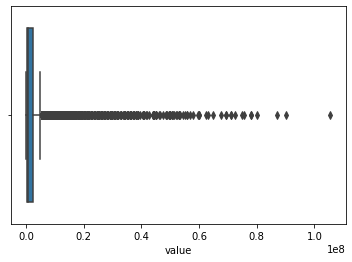

In [24]:
# Column 'age'
sns.boxplot(fifa["value"])
plt.show()

In [25]:
iqr = np.percentile(fifa['value'],75) - np.percentile(fifa['value'],25) 
iqr

2025000.0

In [26]:
upper_limit = np.percentile(fifa['value'],75) + 1.5*iqr
lower_limit = np.percentile(fifa['value'],25) - 1.5*iqr
upper_limit, lower_limit

(5437500.0, -2662500.0)

In [27]:
fifa = fifa[(fifa['value']>lower_limit) & (fifa['value']<upper_limit)]
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova,rank_value
2413,D. Latza,30,74,Germany,74,Right,5000000,24000,382,369,82,20.0,113.0
7452,Fede,23,73,Spain,79,Right,5000000,13000,333,330,79,21.0,113.0
2274,S. Lulić,34,78,Bosnia Herzegovina,78,Right,5000000,56000,389,357,78,16.0,113.0
6816,K. Lawrence,27,74,Jamaica,74,Left,5000000,18000,340,285,75,20.0,113.0
6421,Erik,25,73,Brazil,75,Right,5000000,12000,340,247,25,21.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Rogério Ceni,40,75,Brazil,75,Right,0,30000,251,192,42,19.0,216.0
2036,I. Popov,31,75,Bulgaria,75,Right,0,0,356,356,73,19.0,216.0
1853,E. Choupo-Moting,31,75,Cameroon,75,Right,0,0,359,306,55,19.0,216.0
6403,Y. Gazinskiy,30,75,Russia,75,Right,0,0,330,316,76,19.0,216.0


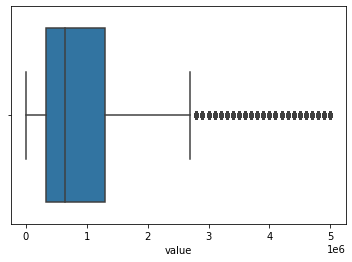

In [28]:
sns.boxplot(fifa["value"])
plt.show()

In [29]:
# Column 'wage'

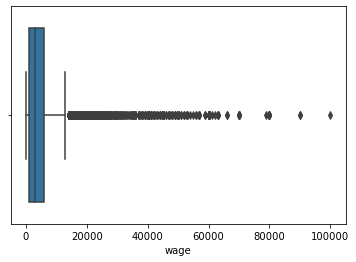

In [30]:
sns.boxplot(fifa["wage"])
plt.show()

In [31]:
iqr = np.percentile(fifa['wage'],75) - np.percentile(fifa['wage'],25) 
iqr

5000.0

In [32]:
upper_limit = np.percentile(fifa['wage'],75) + 1.5*iqr
lower_limit = np.percentile(fifa['wage'],25) - 1.5*iqr
upper_limit, lower_limit

(13500.0, -6500.0)

In [33]:
fifa = fifa[(fifa['wage']>lower_limit) & (fifa['wage']<upper_limit)]
fifa

,name,age,ova,nationality,pot,foot,value,wage,power,mentality,aggression,rank_ova,rank_value
7452,Fede,23,73,Spain,79,Right,5000000,13000,333,330,79,21.0,113.0
6421,Erik,25,73,Brazil,75,Right,5000000,12000,340,247,25,21.0,113.0
3359,Dani Rodríguez,32,75,Spain,75,Right,5000000,10000,342,334,60,19.0,113.0
4404,G. Zahid,24,73,Norway,77,Right,5000000,500,340,302,56,21.0,113.0
15335,G. Corujo,24,73,Uruguay,80,Right,5000000,500,295,253,73,21.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,G. Coupet,37,75,France,83,Right,0,0,208,132,36,19.0,216.0
2036,I. Popov,31,75,Bulgaria,75,Right,0,0,356,356,73,19.0,216.0
1853,E. Choupo-Moting,31,75,Cameroon,75,Right,0,0,359,306,55,19.0,216.0
6403,Y. Gazinskiy,30,75,Russia,75,Right,0,0,330,316,76,19.0,216.0


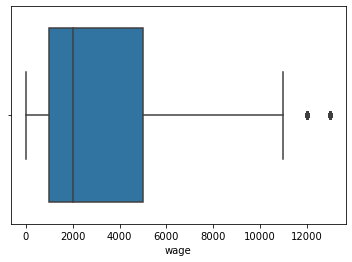

In [34]:
sns.boxplot(fifa["wage"])
plt.show()

In [35]:
fifa.corr(method='spearman')

,age,ova,pot,value,wage,power,mentality,aggression,rank_ova,rank_value
age,1.000000,0.589056,-0.467445,0.171554,0.295542,0.393622,0.396311,0.313157,-0.589056,-0.171554
ova,0.589056,1.000000,0.301920,0.779133,0.528328,0.512133,0.542229,0.365542,-1.000000,-0.779133
pot,-0.467445,0.301920,1.000000,0.507959,0.139581,0.009933,0.070122,0.009895,-0.301920,-0.507959
value,0.171554,0.779133,0.507959,1.000000,0.598202,0.446079,0.432307,0.255735,-0.779133,-1.000000
wage,0.295542,0.528328,0.139581,0.598202,1.000000,0.339817,0.335326,0.218413,-0.528328,-0.598202
power,0.393622,0.512133,0.009933,0.446079,0.339817,1.000000,0.736655,0.532104,-0.512133,-0.446079
mentality,0.396311,0.542229,0.070122,0.432307,0.335326,0.736655,1.000000,0.698308,-0.542229,-0.432307
aggression,0.313157,0.365542,0.009895,0.255735,0.218413,0.532104,0.698308,1.000000,-0.365542,-0.255735
rank_ova,-0.589056,-1.000000,-0.301920,-0.779133,-0.528328,-0.512133,-0.542229,-0.365542,1.000000,0.779133
rank_value,-0.171554,-0.779133,-0.507959,-1.000000,-0.598202,-0.446079,-0.432307,-0.255735,0.779133,1.000000


In [36]:
corr_data = fifa.select_dtypes([np.number])
correlations_matrix = corr_data.corr()
correlations_matrix

,age,ova,pot,value,wage,power,mentality,aggression,rank_ova,rank_value
age,1.000000,0.556093,-0.417559,0.110437,0.257818,0.302115,0.243329,0.258347,-0.556293,-0.066490
ova,0.556093,1.000000,0.348587,0.656774,0.518601,0.482764,0.411554,0.338753,-0.999941,-0.692295
pot,-0.417559,0.348587,1.000000,0.441990,0.186269,0.041100,0.086411,0.023514,-0.348411,-0.479158
value,0.110437,0.656774,0.441990,1.000000,0.565465,0.348421,0.296797,0.204272,-0.657019,-0.874013
wage,0.257818,0.518601,0.186269,0.565465,1.000000,0.307051,0.264309,0.197780,-0.518748,-0.594288
power,0.302115,0.482764,0.041100,0.348421,0.307051,1.000000,0.800144,0.600879,-0.482609,-0.405619
mentality,0.243329,0.411554,0.086411,0.296797,0.264309,0.800144,1.000000,0.759104,-0.411457,-0.332189
aggression,0.258347,0.338753,0.023514,0.204272,0.197780,0.600879,0.759104,1.000000,-0.338732,-0.222663
rank_ova,-0.556293,-0.999941,-0.348411,-0.657019,-0.518748,-0.482609,-0.411457,-0.338732,1.000000,0.692380
rank_value,-0.066490,-0.692295,-0.479158,-0.874013,-0.594288,-0.405619,-0.332189,-0.222663,0.692380,1.000000


In [37]:
mask = np.zeros_like(correlations_matrix)
print(np.triu_indices_from(mask))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4,
       5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8,
       9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9]))


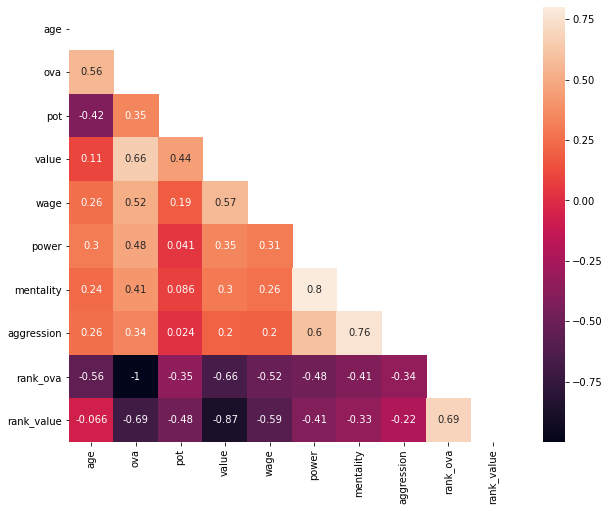

In [43]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
figure = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.savefig('hmap.png', dpi=400)
plt.show()

# 6 Linear Regression

In [52]:
new_fifa = fifa[['age', 'ova', 'value', 'wage', 'power', 'mentality', 'aggression']].copy()
new_fifa

,age,ova,value,wage,power,mentality,aggression
7452,23,73,5000000,13000,333,330,79
6421,25,73,5000000,12000,340,247,25
3359,32,75,5000000,10000,342,334,60
4404,24,73,5000000,500,340,302,56
15335,24,73,5000000,500,295,253,73
...,...,...,...,...,...,...,...
38,37,75,0,0,208,132,36
2036,31,75,0,0,356,356,73
1853,31,75,0,0,359,306,55
6403,30,75,0,0,330,316,76


In [53]:
X = new_fifa.drop(['value'], axis=1)
y = new_fifa['value']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     3147.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:57:14   Log-Likelihood:            -1.9354e+05
No. Observations:               13173   AIC:                         3.871e+05
Df Residuals:                   13166   BIC:                         3.872e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.448e+06   6.92e+04    -78.750      0.0